# Introduction
In this capstone project, I aim to provide insights that support stakeholders in making data-driven decisions to improve employee retention and satisfaction by fostering a healthier and more supportive work environment. Stakeholders have requested assistance in answering the key question: *What factors are likely to make an employee leave the company?*

The project focuses on developing a machine learning model to predict whether or not an employee will leave the company, enabling stakeholders to proactively address potential issues and enhance the accuracy of their decision-making. By identifying the key factors influencing employee attrition, this project offers actionable insights for both current and future workforce planning. 

The analysis follows the **PACE framework**, systematically applying each stage to ensure a thorough and effective approach.

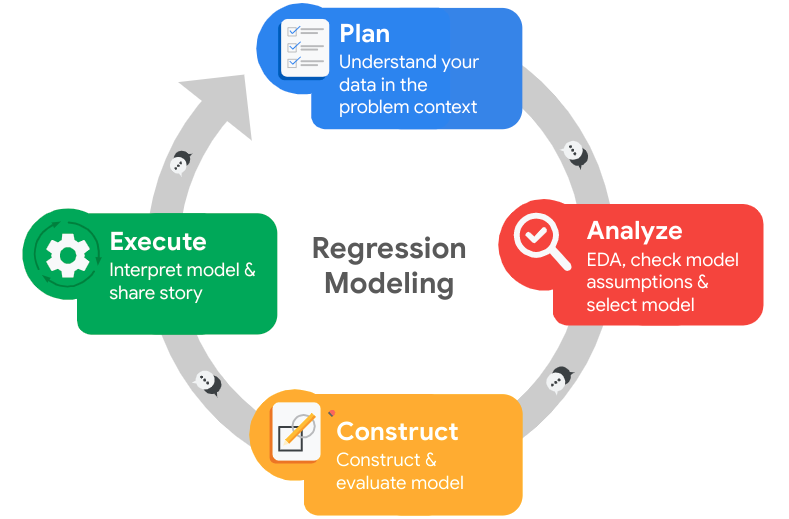

# Plan

## Business Problem & Objective
Employee attrition remains a critical challenge for the organization, affecting both productivity and operational costs. High turnover leads to increased recruitment efforts, onboarding time, and a potential loss of institutional knowledge. Addressing this issue effectively is essential for maintaining a stable and satisfied workforce.

The objective of this project is to build a predictive model that identifies employees at risk of leaving the company. By uncovering the key factors that contribute to employee attrition, this analysis will empower stakeholders to take proactive steps toward improving satisfaction, reducing turnover, and fostering a healthier work environment.

## Key Research Questions
The key question driving this project is: *“What factors are likely to make an employee leave the company?”* While this question is essential, it is quite broad. To make the analysis more focused and manageable, we can break it down into smaller, more specific sub-questions:
* **Who are the employees most likely to leave?**
* **Why do employees leave?**
* **When are employees most likely to leave?**
  
This approach not only simplifies the problem but also helps structure the analysis and leads to a more comprehensive answer to the core question.
  
## Stakeholders
* **HR department:**  Responsible for designing and implementing retention strategies.
* **Executives and Leadership Teams:** Interested in reducing costs associated with turnover and improving company culture.
* **Data & Analytics Team:** Supporting technical development and interpretation of the model outputs



#### Import and Load Data

In [1]:
# Import Packages
# For data manipulation
import numpy as np
import pandas as pd
import warnings
import math

warnings.filterwarnings("ignore", category=FutureWarning)

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set2") 

# For data modeling
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report


In [2]:
# Load Data
df = pd.read_csv("/kaggle/input/hr-analytics-and-job-prediction/HR_comma_sep.csv")

In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


#### Summary Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Data Overview
* **Data Source:** The dataset used in this project is derived from internal HR records (or specify the source if it's public, e.g., Kaggle HR dataset).

* **Structure:** The dataset contains information on employee attributes such as satisfaction level, evaluation scores, number of projects, average monthly hours, time spent at the company, Work_accident, promotion in the last 5 years, department, salary and whether or not the employee has left.

* **Target Variable:** The primary target variable is left, a binary indicator where 1 represents an employee who left the company, and 0 represents an employee who stayed.

* **Initial Shape:** The dataset consists of 14999 rows and 10 columns.

## Data Exploration (Initial EDA and data cleaning)

Column names need to be corrected for spelling errors and standardized, as some feature names begin with uppercase letters while others begin with lowercase.

In [5]:
# Standardize column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('[^a-z0-9_]', '', regex=True)  # Remove other special characters
)

# Fix spelling Errors
df.rename(columns={
    'average_montly_hours':'average_monthly_hours',
    'time_spend_company': 'tenure'
}, inplace=True)

#### Check Missing values
The dataset does not contain any missing values.

In [6]:
df.replace('', np.nan, inplace=True)  # Convert empty strings to NaN
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

#### Check duplicates

In [7]:
df.duplicated().sum()

3008

In [8]:
df = df.drop_duplicates().reset_index(drop=True)
print("Remaining duplicates:", df.duplicated().sum())

Remaining duplicates: 0



# Analysis

## Data Exploration (Continue EDA and data cleaning)

#### Descriptive statistics Information

In [9]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Data Distribution

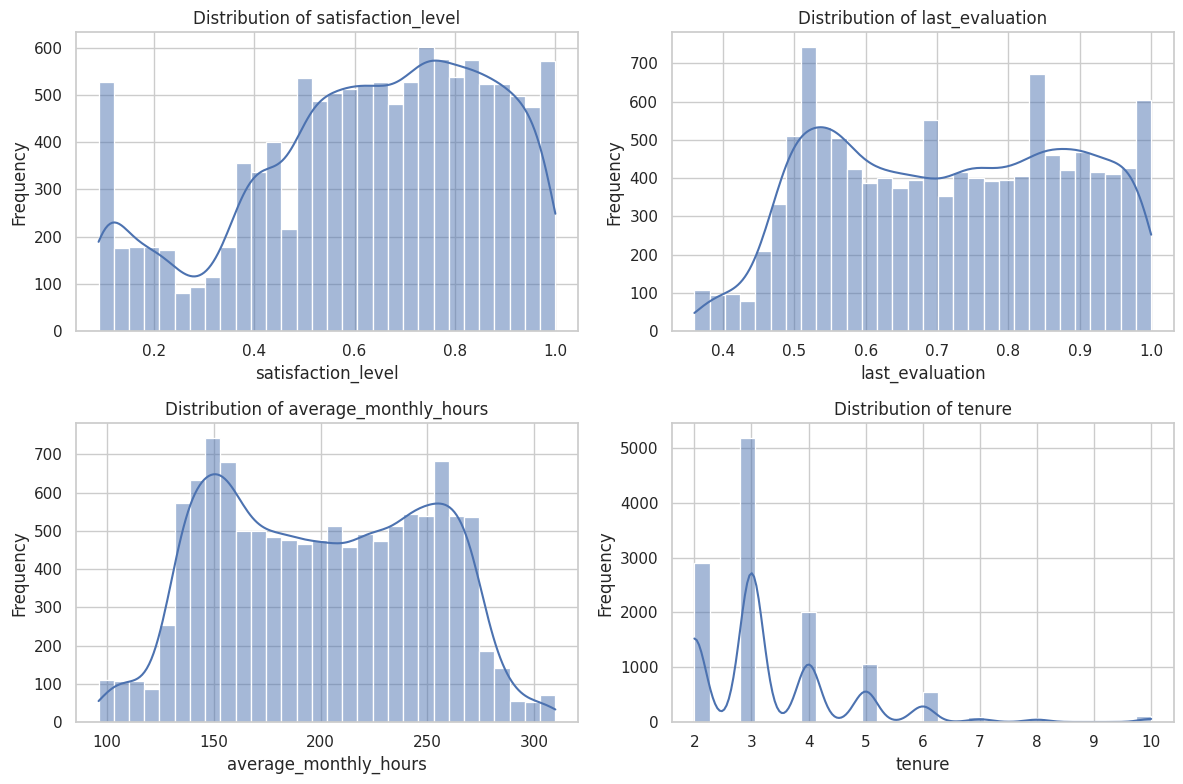

In [10]:
# List of continuous numerical columns (customize as needed)
continuous_vars = ['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'tenure']

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Loop through and plot
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Key Insights from Data Distribution**
* Satisfaction Level: Bimodal pattern suggests two distinct groups — highly satisfied vs. dissatisfied employees.
* Last Evaluation: Scores are widely spread, mostly mid-to-high, indicating varied performance levels.
* Average Monthly Hours: Peaks around 150, 200, and 250 hours suggest inconsistent workload distribution.
* Tenure: Most employees leave around 3 years, highlighting a key attrition risk point.

#### Check Outliers

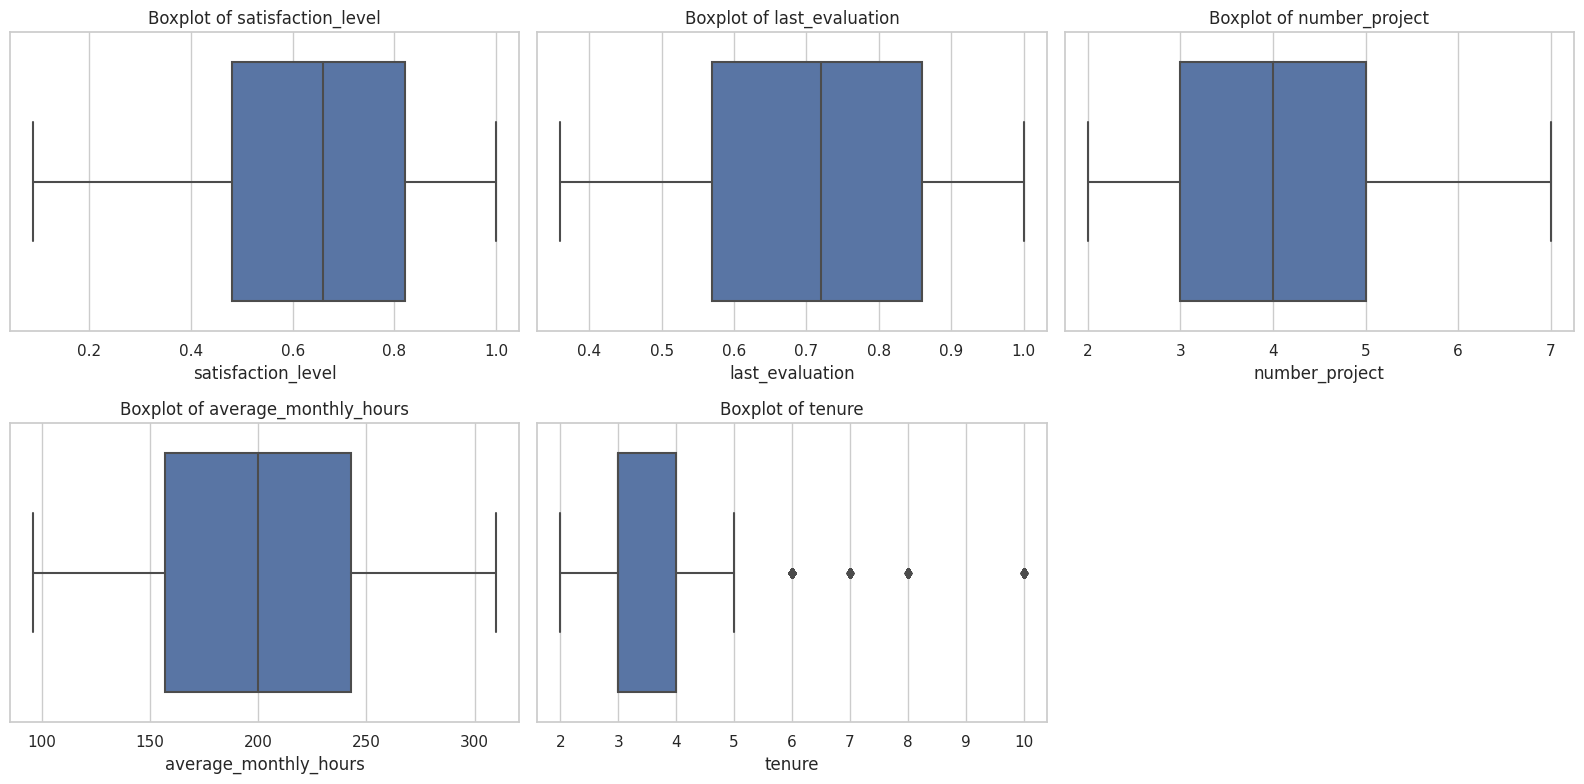

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers

numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
                if df[col].nunique() > 2]

# Set up the plot
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot each boxplot
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
# Determine the number of rows containing outliers

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Loop through numeric columns and count outliers
for col in numeric_cols:
    outlier_count = count_outliers(df[col])
    print(f"{col}: {outlier_count} outliers")

satisfaction_level: 0 outliers
last_evaluation: 0 outliers
number_project: 0 outliers
average_monthly_hours: 0 outliers
tenure: 824 outliers


The column **tenure** is the only feature that contains outliers, with **824** records identified as such. This represents approximately **7%** of the dataset. 
Some models are sensitive to outliers, while others are more robust. Since we have not yet decided which model to use, we will postpone the decision to exclude outliers until after model selection.

#### Data imbalance check

In [13]:
left_count = (df['left'].value_counts())
left_count.index = ['Stayed (0)', 'Left (1)']

left_percent = (df['left'].value_counts(normalize=True) * 100).round(2)
left_percent.index = ['Stayed (0)', 'Left (1)']

print(left_count)
print(left_percent)

Stayed (0)    10000
Left (1)       1991
Name: count, dtype: int64
Stayed (0)    83.4
Left (1)      16.6
Name: proportion, dtype: float64


Out of **11,991** records, **1,991** employees (approximately **17%**) left the company, while the remaining **83%** stayed. This indicates that the dataset is **imbalanced**, with a higher proportion of retained employees compared to those who left.

## Data visualizations
Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

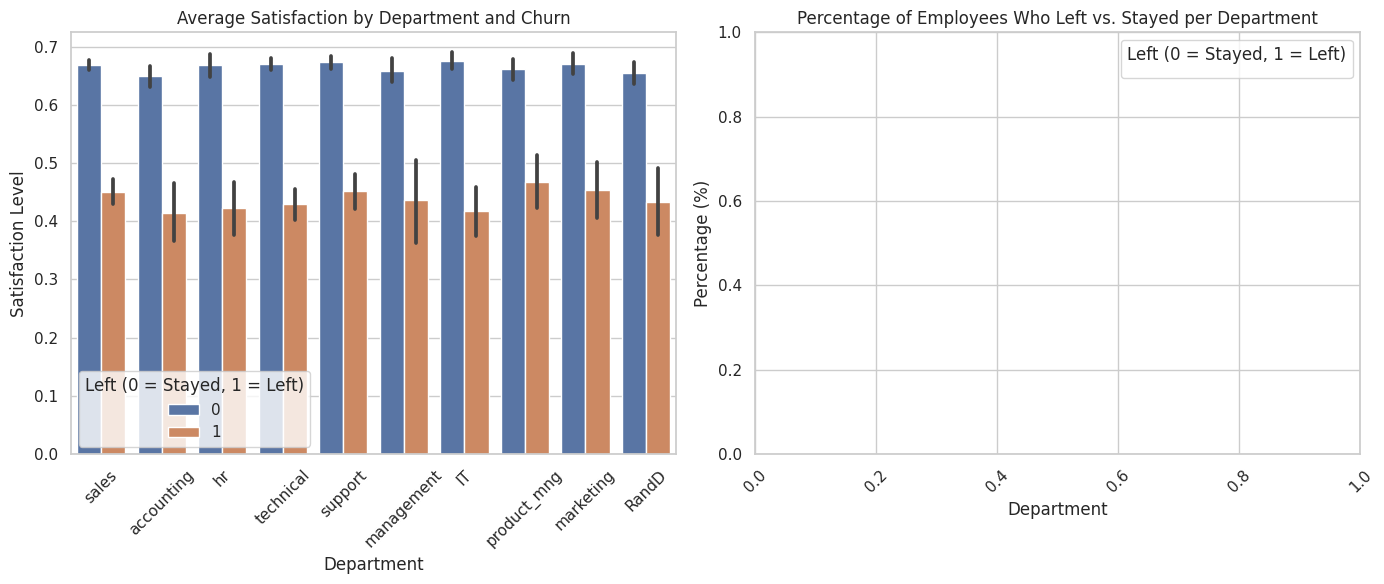

In [14]:
# Prepare churn percentage data per department
dept_churn = (
    df.groupby('department')['left']
    .value_counts(normalize=True)
    .rename('percent')
    .reset_index()
)
dept_churn['percent'] = (dept_churn['percent'] * 100).round(1)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Subplot 1: Satisfaction level by department and churn status ---
sns.barplot(
    data=df,
    x='department',
    y='satisfaction_level',
    hue='left',
    estimator='mean',
    ax=axes[0]
)
axes[0].set_title('Average Satisfaction by Department and Churn')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Satisfaction Level')
axes[0].legend(title='Left (0 = Stayed, 1 = Left)')
axes[0].tick_params(axis='x', rotation=45)

# --- Subplot 2: Left vs. Stayed % per department ---
axes[1].set_title('Percentage of Employees Who Left vs. Stayed per Department')
axes[1].set_xlabel('Department')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Left (0 = Stayed, 1 = Left)')
axes[1].tick_params(axis='x', rotation=45)

# Final layout
plt.tight_layout()
plt.show()


As observed from the above plots comparing the proportion of employees who left versus stayed and their corresponding satisfaction levels, there is **no significant difference** across most departments. This suggests that the department feature may not have a strong influence.

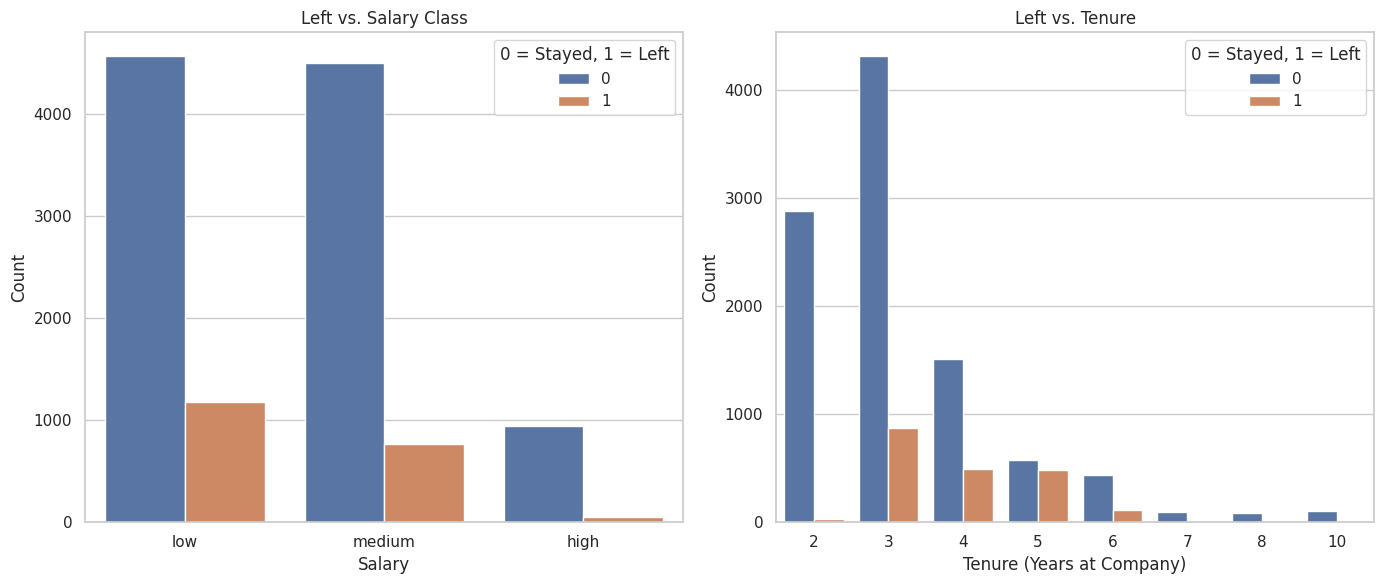

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#Subplot 1: Countplot of Salary Class vs Left
sns.countplot(data=df, x='salary', hue='left', ax=axes[0])
axes[0].set_title('Left vs. Salary Class')
axes[0].set_xlabel('Salary')
axes[0].set_ylabel('Count')
axes[0].legend(title='0 = Stayed, 1 = Left')

#Subplot 2: Countplot of Tenure vs Left
sns.countplot(data=df, x='tenure', hue='left', ax=axes[1])
axes[1].set_title('Left vs. Tenure')
axes[1].set_xlabel('Tenure (Years at Company)')
axes[1].set_ylabel('Count')
axes[1].legend(title='0 = Stayed, 1 = Left')

plt.tight_layout()
plt.show()


In [16]:
total_counts = df.groupby('salary').size()
left_counts = df[df['left'] == 1].groupby('salary').size()

# Compute proportions (%)
proportion_left = (left_counts / total_counts * 100).round(1)
print(proportion_left)

salary
high       4.8
low       20.5
medium    14.6
dtype: float64


Employee attrition decreases with higher salary — **21%** of low-salary employees left, compared to **15%** in medium and only **5%** in high salary classes, suggesting better pay supports retention.

In [17]:
# Group by tenure and count total employees
total_by_tenure = df.groupby('tenure').size()

# Group by tenure and count only those who left
left_by_tenure = df[df['left'] == 1].groupby('tenure').size()

# Calculate percentage of left
left_percentage = (left_by_tenure / total_by_tenure * 100).round(1).fillna(0)

print(left_percentage)

tenure
2      1.1
3     16.8
4     24.7
5     45.4
6     20.1
7      0.0
8      0.0
10     0.0
dtype: float64


Attrition peaks at year **5 (45.4%)**, likely due to burnout or unmet expectations. It rises steadily from year **3** to **4**, but drops sharply after year **6**, with **0%** attrition in years **7**, **8** and **10**, suggesting long-term employees are more loyal and satisfied.

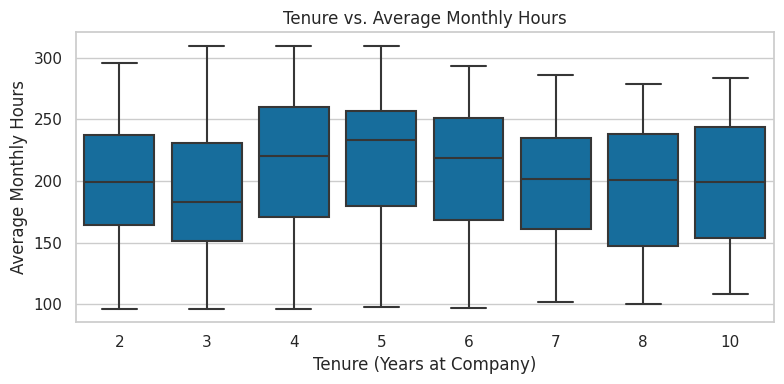

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot: Tenure vs. Average Monthly Hours using boxplot with one color
sns.boxplot(data=df, x='tenure', y='average_monthly_hours', color='#0173B2', ax=ax)  # Blue from colorblind palette

# Labels and title
ax.set_title('Tenure vs. Average Monthly Hours')
ax.set_xlabel('Tenure (Years at Company)')
ax.set_ylabel('Average Monthly Hours')

plt.tight_layout()
plt.show()


In [19]:
# Calculate median average_monthly_hours by tenure
median_hours = df.groupby('tenure')['average_monthly_hours'].median().round(1)
print(median_hours)

tenure
2     199.0
3     183.0
4     220.0
5     233.0
6     219.0
7     202.0
8     201.0
10    199.0
Name: average_monthly_hours, dtype: float64


Attrition isn’t solely tied to workload. While **5-year** employees had the highest median hours (**233h**) and highest attrition, **3-year** employees had the lowest workload (**183h**) yet still showed **16%** attrition. Moderate workloads (**199–202h**) in years **2**, **7**, **8** and **10** aligned with higher retention, suggesting a balance may promote stability.

Attrition peaks at year **5** (**45.4%**), aligning with the highest median workload (**233h**) — suggesting burnout may drive exits. Despite lower hours (**183h**) at year **3**, attrition still rises, pointing to other factors like unmet expectations. After year **6**, attrition drops to **0%** as workloads stabilize (**199–202h**), indicating that balanced demands may support long-term retention.

**Next:** Since workload appears to be linked to attrition, let's further investigate related factors, such as the number of projects and average monthly working hours by comparing employees who left with those who stayed.

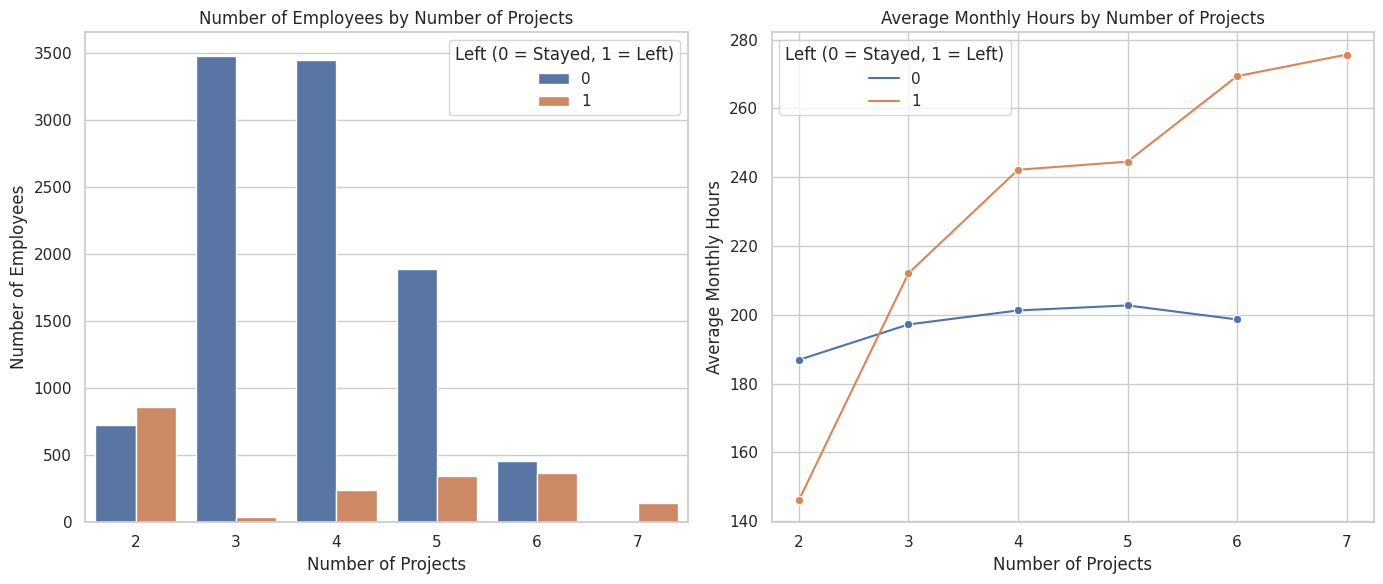

In [20]:
# Step 1: Aggregate average monthly hours by number_project and left
avg_hours = df.groupby(['number_project', 'left'])['average_monthly_hours'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Subplot 1: Countplot ---
sns.countplot(data=df, x='number_project', hue='left', ax=axes[0])
axes[0].set_title('Number of Employees by Number of Projects')
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Number of Employees')
axes[0].legend(title='Left (0 = Stayed, 1 = Left)')

# --- Subplot 2: Line Plot of average monthly hours ---
sns.lineplot(
    data=avg_hours,
    x='number_project',
    y='average_monthly_hours',
    hue='left',
    marker='o',
    ax=axes[1]
)
axes[1].set_title('Average Monthly Hours by Number of Projects')
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('Average Monthly Hours')
axes[1].legend(title='Left (0 = Stayed, 1 = Left)')

# Layout
plt.tight_layout()
plt.show()


In [21]:
# Total employees by number of projects
total_by_project = df.groupby('number_project').size()

# Employees who left by number of projects
left_by_project = df[df['left'] == 1].groupby('number_project').size()

# Percentage of employees who left per project group
left_percentage_by_project = (left_by_project / total_by_project * 100).round(1).fillna(0)

print(left_percentage_by_project)

number_project
2     54.2
3      1.1
4      6.4
5     15.4
6     44.9
7    100.0
dtype: float64


Attrition is highest at workload extremes **54.2%** for those with **2** projects and **100%** for **7** projects—indicating that both underutilization and overload can drive exits. In contrast, managing **3–4** projects shows the lowest attrition (**1.1%–6.4%**), suggesting this as an optimal workload range.
Employees who stayed had consistent working hours (**190–197h/month**), while those who left showed wide variation (**~145h to ~278h**), reinforcing that imbalance—too little or too much—may increase turnover risk.
Notably, working **~278h/month** (equivalent to 9+ hours daily including weekends) signals a severe workload issue. Maintaining balanced project assignments is key to retention and employee well-being.

In [22]:
df['promotion_last_5years'].value_counts(normalize=True) * 100

promotion_last_5years
0    98.307064
1     1.692936
Name: proportion, dtype: float64

In [23]:
# Count of employees who left and were promoted
num_promoted_leavers = df[(df['left'] == 1) & (df['promotion_last_5years'] == 1)].shape[0]
print("Number of employees who left and were promoted:", num_promoted_leavers)

Number of employees who left and were promoted: 8


Only **1.7%** of employees received a promotion in the past **5** years, and just **0.40%** of those who left had been promoted. This highlights a severe lack of advancement opportunities, which may drive dissatisfaction and attrition, especially among long-tenured or high-performing staff. Limited career growth appears to be a key factor in employee turnover.

**Next:** Let’s investigate satisfaction levels across all tenure years. Previous findings suggest that employees experiencing heavy workloads, long hours, and limited promotions may be dissatisfied with management. Additionally, we’ll explore whether employees with low performance and evaluation scores were more likely to be terminated due to underperformance.

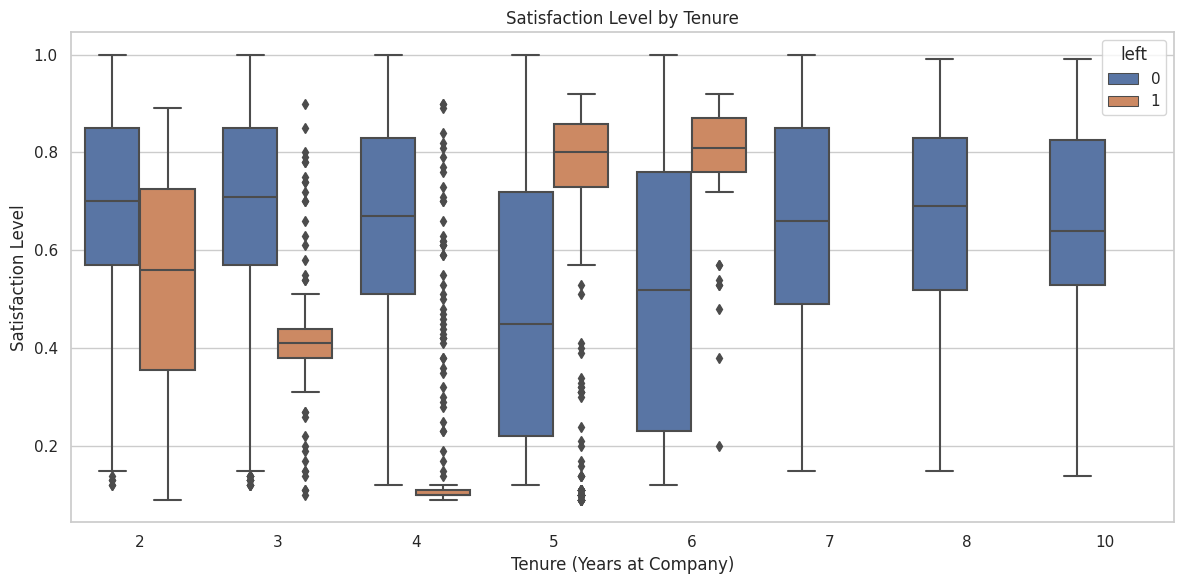

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='tenure', y='satisfaction_level',  hue='left')
plt.title('Satisfaction Level by Tenure')
plt.xlabel('Tenure (Years at Company)')
plt.ylabel('Satisfaction Level')
plt.tight_layout()
plt.show()

* Years 2–3: Leavers show noticeably lower satisfaction than those who stayed, indicating **early dissatisfaction** drives attrition.

* Year 4: Sharp drop in satisfaction among leavers with a very narrow range (less than 0.2), **suggesting a critical pain point or systemic issue**.

* Years 5–6: Leavers have high satisfaction, implying exits may be voluntary or opportunity-driven, not due to dissatisfaction.

* Years 7–10: Mostly stayed employees with consistently high satisfaction, indicating strong retention and engagement among long-term staff.

While leavers in years 5–6 report high satisfaction, their exits may reflect voluntary turnover driven by external opportunities or latent dissatisfaction not captured by surface-level metrics. This highlights the need for deeper engagement analysis beyond basic satisfaction scores.

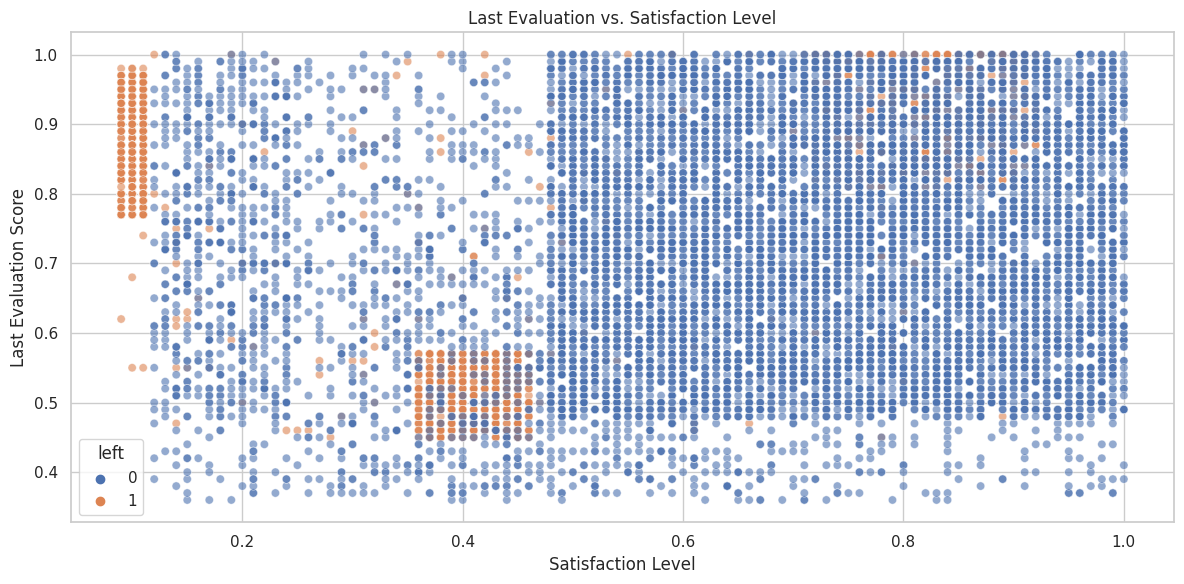

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='satisfaction_level',
    y='last_evaluation',
    hue='left',
    alpha=0.6
)
plt.title('Last Evaluation vs. Satisfaction Level')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation Score')
plt.tight_layout()
plt.show()


* Starting from the left side of the plot, we observe a group of employees who left despite having high evaluation scores (~0.65–0.98) but low satisfaction levels. This suggests potential issues such as burnout, lack of recognition, or workplace dissatisfaction that warrant further investigation.

* Another group of leavers appears with moderate satisfaction levels(~0.3–0.58). These employees may have left due to **disappointment with performance reviews or lack of growth**.

* The majority of employees are concentrated in the region where both satisfaction and evaluation scores range from ~0.5 to 1.0. Most of these employees stayed, indicating that balanced satisfaction and performance correlates with retention. A few employees in this range did leave, which could suggest **voluntary exits driven by external opportunities** rather than dissatisfaction.

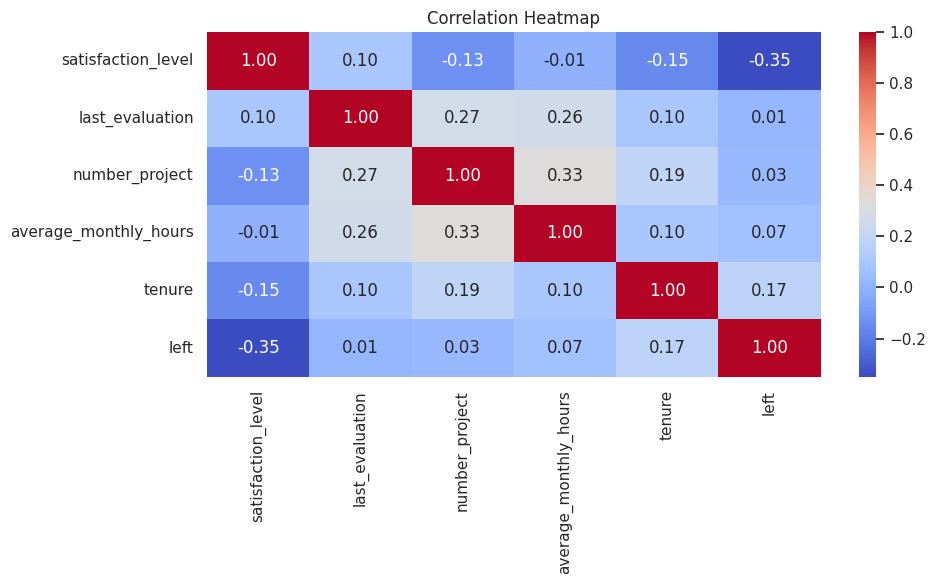

In [26]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure', 'left']]
            .corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

Satisfaction level stands out as the most influential factor related to employee attrition, while other variables show weaker direct relationships. This reinforces the importance of employee well-being in retention strategies.

## Assumptions
* Independence: Each employee record is independent of the others.
* Feature Relevance: Key features such as satisfaction level, evaluation score, number of projects, average monthly hours, and tenure are relevant and provide sufficient information to understand and predict employee attrition.
* Model-Specific Assumptions:
    * Logistic Regression: Assumes a linear relationship between independent variables and the log odds of the target.
    * Tree-Based Models: Less sensitive to outliers and distribution shape, but assume informative splits exist.

## Model Selection
In this analysis, multiple models will be trained and evaluated to identify the one that delivers the most accurate and reliable predictions for employee attrition.
* **Logistic Regression** was chosen for its interpretability and ability to provide insights into feature influence and directionality.
* **Decision Tree** was selected to capture non-linear relationships and visualize decision paths.
* **Random Forest** was used to reduce overfitting by aggregating predictions from multiple decision trees and to assess feature importance.

# Construct

## Data Processing

#### Encoding categorical variables

In [27]:
salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
df['salary_cls'] = df['salary'].map(salary_mapping)

In [28]:
# Convert 'department' column to dummy variables
df_enc = pd.get_dummies(df, columns=['department'])
df_enc = df_enc.drop("salary", axis=1, errors='ignore')

#### Splitting Data

In [29]:
# Split features and target
X = df_enc.drop('left', axis=1)
y = df_enc['left']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Model Training

### Logistic Regression

In [30]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', solver='liblinear')
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}


scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Grid search with 5-fold cross-validation
grid_search_lr = GridSearchCV(
    log_reg,
    param_grid_lr,
    scoring=scoring,              # multi-metric
    refit='roc_auc',              # pick the metric you want to optimize
    cv=5,
    return_train_score=True,
    n_jobs=-1
)
grid_search_lr.fit(X_train, y_train)

# Best model
best_lr = grid_search_lr.best_estimator_
print("Best Parameters:", grid_search_lr.best_params_)
print(f"Mean Cross-Validated AUC: {grid_search_lr.best_score_:.2f}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Mean Cross-Validated AUC: 0.83


In [31]:
y_pred_lr = best_lr.predict(X_test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_lr, target_names=['Not Leave', 'Leave']))


Classification Report (Test Set):
              precision    recall  f1-score   support

   Not Leave       0.96      0.77      0.86      2001
       Leave       0.43      0.85      0.57       398

    accuracy                           0.79      2399
   macro avg       0.70      0.81      0.71      2399
weighted avg       0.88      0.79      0.81      2399



### Decision Tree

In [32]:
# Instantiate Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# 3. Define hyperparameters to search
cv_params = {
    'max_depth': [4, 6, 8, None],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 6]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

grid_search_dt = GridSearchCV(estimator=tree,
                           param_grid=cv_params,
                           scoring=scoring,
                           cv=4,
                           refit='roc_auc',
                           n_jobs=-1,
                           verbose=1)

# 6. Fit
grid_search_dt.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [33]:
print("Best Parameters:", grid_search_dt.best_params_)
print("Best ROC AUC Score on Training Set:", grid_search_dt.best_score_)

Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}
Best ROC AUC Score on Training Set: 0.9723763685033361


In [34]:
# Predict on test set
best_tree = grid_search_dt.best_estimator_
y_pred_dt = best_tree.predict(X_test)

# Evaluation
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_dt))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



All of these scores from the Decision Tree model are strong indicators of good predictive performance.

However, it is important to note that **Decision Trees are prone to overfitting**, especially when not properly pruned.

To improve generalization and reduce overfitting risk, a **Random Forest model** can be constructed next. Random Forests combine multiple trees through ensemble learning, typically resulting in more robust and stable predictions.

### Random Forest 

In [35]:
# Define the hyperparameter grid
cv_params = {
    'max_depth': [3, 5, None],
    'max_features': [1.0],
    'max_samples': [0.7, 1.0],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [300, 500]
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Apply GridSearchCV with refit based on ROC AUC
grid_search_rf = GridSearchCV(estimator=rf,
                       param_grid=cv_params,
                       scoring=scoring,
                       refit='roc_auc',
                       cv=4,
                       n_jobs=-1,
                       verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'},
             verbose=1)

In [36]:
# Predict on test set
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399



## Model Evaluation

In [37]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

#### Confusion matrix

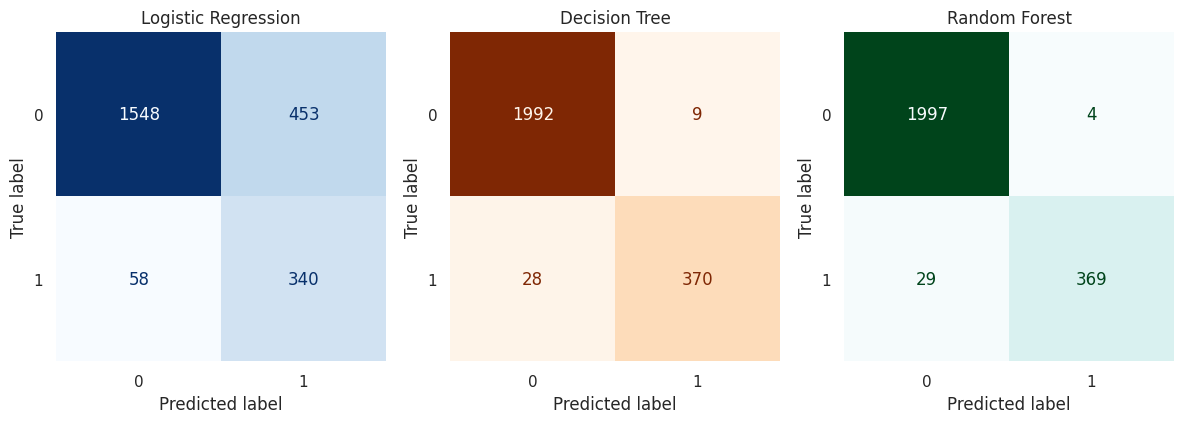

In [38]:
# Create figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6))  # 1 row, 3 columns

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=best_lr.classes_)
disp_lr.plot(cmap="Blues", ax=axes[0], colorbar=False)
axes[0].set_title("Logistic Regression")

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=best_tree.classes_)
disp_dt.plot(cmap="Oranges", ax=axes[1], colorbar=False)
axes[1].set_title("Decision Tree")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap="BuGn", ax=axes[2], colorbar=False)
axes[2].set_title("Random Forest")

for ax in axes:
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.grid(False)

plt.tight_layout()
plt.show()

**Logistic Regression:**
* False Positives (Type I Error): 453
* False Negatives (Type II Error): 58
* Lower precision due to many false positives.

**Decision Tree:**
* Very few errors: 9 false positives, 28 false negatives
* Balanced performance.

**Random Forest:**
* Best overall: only 4 false positives and 29 false negatives
* Most precise and stable.

#### Performance metrics: Accuracy, Precision, Recall, F1, ROC AUC

In [39]:
tree1_cv_results = make_results('Decision Tree CV', grid_search_dt, 'auc')
rf_cv_results = make_results('Random Forest CV', grid_search_rf, 'auc')
logreg_cv_results = make_results('Logistic Regression CV', grid_search_lr, 'auc')

all_cv_results = pd.concat([logreg_cv_results, tree1_cv_results, rf_cv_results], ignore_index=True).round(2)

# Display nicely
display(all_cv_results)


,model,precision,recall,F1,accuracy,auc
0,Logistic Regression CV,0.41,0.83,0.55,0.77,0.83
1,Decision Tree CV,0.97,0.92,0.94,0.98,0.97
2,Random Forest CV,0.98,0.91,0.94,0.98,0.98


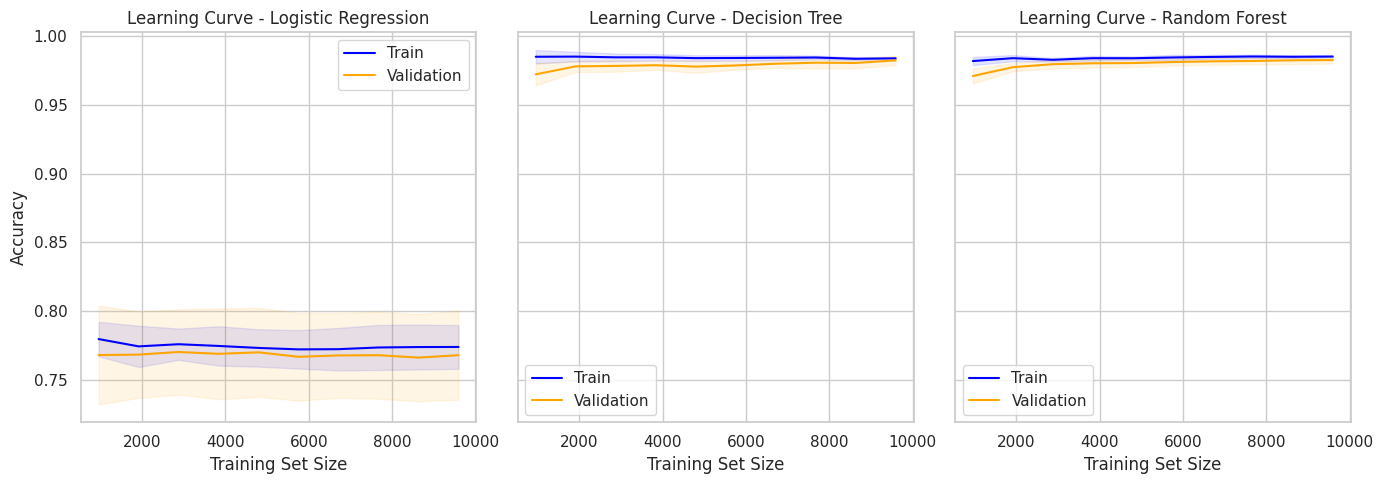

In [40]:
# Models
models = [
    ("Logistic Regression", log_reg),
    ("Decision Tree", best_tree),
    ("Random Forest", best_rf)
]

# Setup subplots
fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

for idx, (name, model) in enumerate(models):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42
    )

    # Calculate means and stds
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    ax = axes[idx]
    ax.plot(train_sizes, train_mean, label='Train', color='blue')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')

    ax.plot(train_sizes, val_mean, label='Validation', color='orange')
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='orange')

    ax.set_title(f'Learning Curve - {name}')
    ax.set_xlabel('Training Set Size')
    if idx == 0:
        ax.set_ylabel('Accuracy')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


**Logistic Regression**
Training and validation accuracy remain stable but modest (~0.77–0.78), indicating consistent but limited predictive power.

**Decision Tree and Random Forest**
Both models achieve high accuracy. The Decision Tree shows near-perfect training accuracy with a small gap to validation, while Random Forest maintains similarly high scores for both training and validation with smoother, more parallel learning curves. This suggests that Random Forest generalizes slightly better, offering strong performance with reduced risk of overfitting.

## Feature Importance

In [41]:
# Create a pandas Series of feature importances

# Feature importances
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
dt_importances = pd.Series(best_tree.feature_importances_, index=X.columns).sort_values(ascending=False)


# Sort descending
rf_importances_sorted = rf_importances.sort_values(ascending=False)
dt_importances_sorted = dt_importances.sort_values(ascending=False)

# Print top features
print("Top 6 Important Features Decision Tree:\n")
print(dt_importances_sorted.head(6))
print("Top 6 Important Features Random Forest:\n")
print(rf_importances_sorted.head(6))

Top 6 Important Features Decision Tree:

satisfaction_level       0.492880
last_evaluation          0.171926
number_project           0.128822
tenure                   0.126357
average_monthly_hours    0.079838
department_support       0.000121
dtype: float64
Top 6 Important Features Random Forest:

satisfaction_level       0.450897
number_project           0.166695
last_evaluation          0.160062
tenure                   0.123428
average_monthly_hours    0.089230
salary_cls               0.002986
dtype: float64


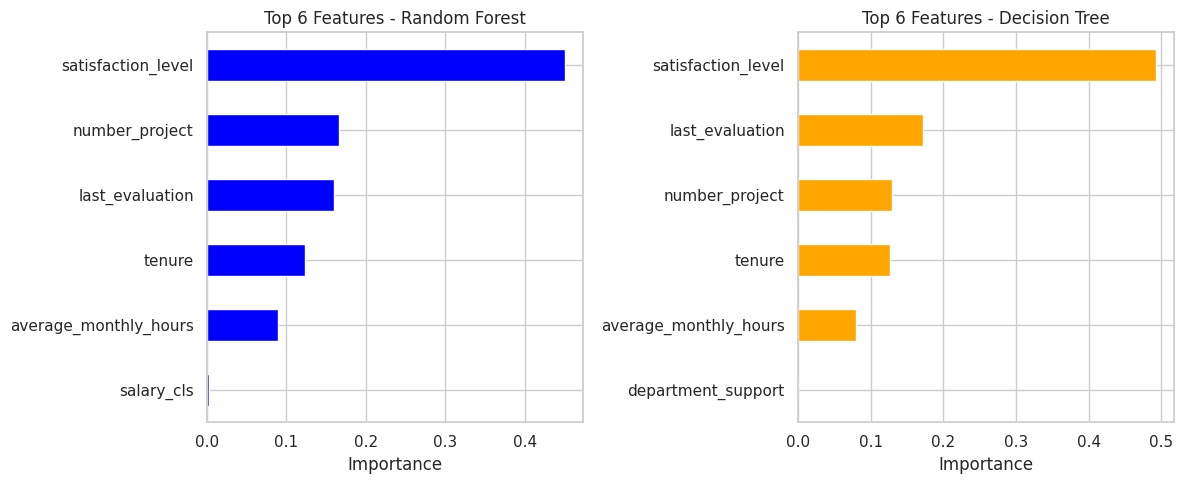

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

# Random Forest plot
rf_importances_sorted.head(6).plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Top 6 Features - Random Forest')
axes[0].set_xlabel("Importance")
axes[0].invert_yaxis()

# Decision Tree plot
dt_importances_sorted.head(6).plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_title('Top 6 Features - Decision Tree')
axes[1].set_xlabel("Importance")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

* **Satisfaction level:** by far the most important feature, contributing nearly half of the model’s decision power. Low satisfaction is strongly associated with employee departure.

* **Number of projects and last_evaluation:** both important indicators; very high or very low values may signal overwork or underperformance concerns.

* **Tenure:** is moderately predictive, possibly identifying critical churn windows (e.g., year 5).

* **Average monthly working hours:** workload is a notable factor, supporting insights from previous plots.

# Execute
## Summary of model results
**Best Model: Random Forest**
* Highest performance across all metrics.
* Balanced, low bias-variance.

**Logistic Regression:** Underperforms, likely too simple for this dataset.

**Decision Tree:** Strong performer but slightly outshined by Random Forest in precision and AUC.

## Recommendations
Limit Project Load: Cap the number of projects assigned to each employee to prevent overwork.

Balance Performance Evaluation: Reward effort and quality, not just long hours. Avoid tying high evaluations solely to excessive workloads.

Support Long-Tenured Staff: Offer career development or promotion opportunities around the 4-year mark to reduce mid-tenure attrition.

Address Work Culture: Facilitate regular team discussions to identify and improve cultural issues contributing to burnout.

## Conclusion
This project provided a comprehensive analysis of the key factors influencing employee attrition. The findings highlight that workload balance, career progression, and employee satisfaction are critical to retention. Attrition peaks at mid-tenure, especially around year 5, suggesting a need for targeted engagement and development strategies during this period.

Models such as Random Forest delivered strong predictive performance, enabling the identification of at-risk employees with high accuracy. Visualizations and feature analysis revealed actionable insights, including the importance of managing project load, offering timely promotions, and monitoring satisfaction trends.

By addressing these areas, the organization can proactively reduce turnover, improve employee well-being, and build a more stable and engaged workforce.